In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file=r"C:\Users\坤達\Downloads\Stocks_ClosePrice.csv"
stock=pd.read_csv(file)
stock

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
...,...,...,...,...,...,...,...,...,...,...,...
245,2019/9/16,186.220001,1231.300049,294.290009,1807.839966,219.899994,-0.005195,-0.006686,0.000476,-0.017274,0.005243
246,2019/9/17,188.080002,1229.150024,298.600006,1822.550049,220.699997,0.009939,-0.001748,0.014539,0.008104,0.003631
247,2019/9/18,188.139999,1232.410034,291.559998,1817.459961,222.770004,0.000319,0.002649,-0.023859,-0.002797,0.009336
248,2019/9/19,190.139999,1238.709961,286.600006,1821.500000,220.960007,0.010574,0.005099,-0.017158,0.002220,-0.008158


In [2]:
#a calculate the mean and std
column=['FB.1','GOOG.1','NFLX.1','AMZN.1','AAPL.1']
mean=stock[column].mean()
std=stock[column].std()
print(f"Mean:\n{mean}",end="\n\n")
print(f"std:\n{std}",end="\n\n")

Mean:
FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

std:
FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64



C:\Users\坤達\AppData\Local\Temp\ipykernel_7712\2534104184.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean[i],std[i],stock.split('.')[0],fontsize='10')


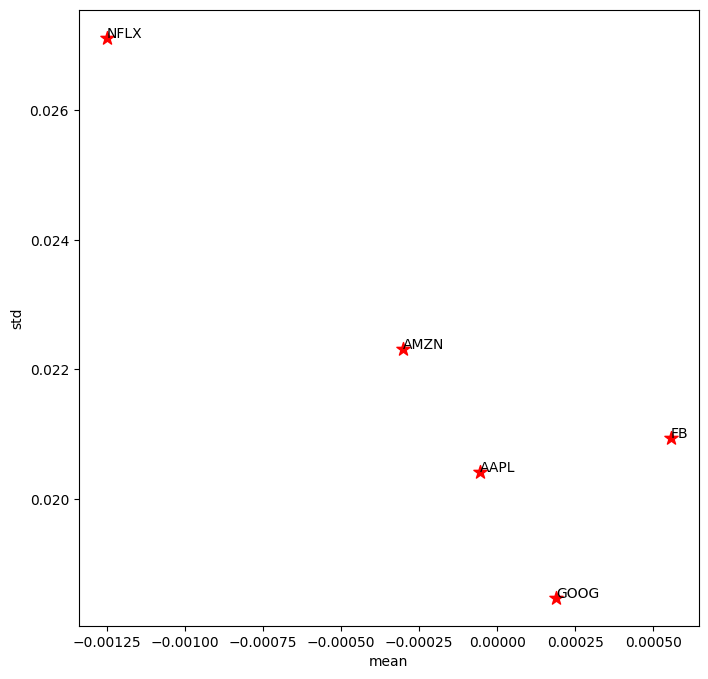

In [3]:
#b plot them at 2-dimensional plane
plt.figure(figsize=(8,8))
plt.scatter(mean,std,color='red',marker='*',s=100)

for i,stock in enumerate(mean.index):
    plt.text(mean[i],std[i],stock.split('.')[0],fontsize='10')

plt.xlabel('mean')
plt.ylabel('std')
plt.show()

In [4]:
#c print the weight

weights=np.random.rand(len(column))
weights/=np.sum(weights)

pf_mean=np.dot(weights,mean)
pf_std=np.sqrt(np.dot(weights**2,std**2))

weights,pf_mean,pf_std

(array([0.16150839, 0.15185371, 0.00651639, 0.22253442, 0.4575871 ]),
 1.7333595944640625e-05,
 0.011459097396326058)

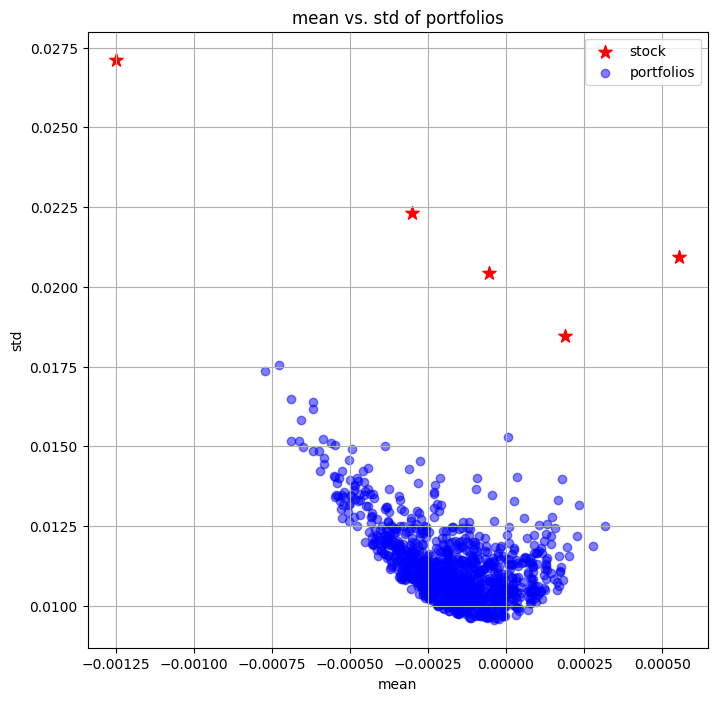

In [5]:
#d repeat (c) 1000 times,and plot them into 2-dimensional plane

n_pfs = 1000
pf_means = []
pf_stds = []

for _ in range(n_pfs):
  
    weights = np.random.rand(len(column))
    weights /= np.sum(weights)
    
    pf_mean=np.dot(weights,mean)
    pf_std=np.sqrt(np.dot(weights**2,std**2))
    
    pf_means.append(pf_mean)
    pf_stds.append(pf_std)


plt.figure(figsize=(8, 8))
plt.scatter(mean, std, color='red', marker='*', s=100,label='stock')
plt.scatter(pf_means, pf_stds, color='blue', alpha=0.5, label='portfolios')


plt.title('mean vs. std of portfolios')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.grid(True)

plt.show()

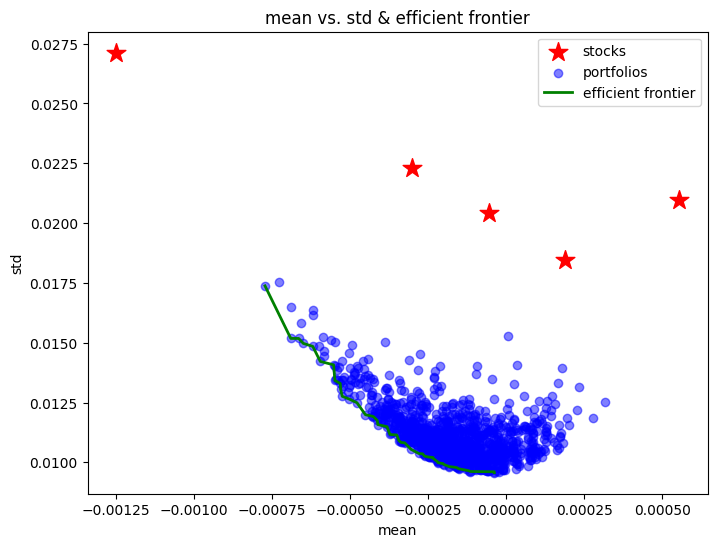

In [6]:
#e draw the efficient frontier
pf_means = np.array(pf_means)
pf_stds = np.array(pf_stds)


indices = np.argsort(pf_means)
sorted_means = pf_means[indices]
sorted_stds = pf_stds[indices]

efficient_frontier_means = []
efficient_frontier_stds = []

for i in range(len(sorted_means)):
    if i == 0 or sorted_stds[i] < min(efficient_frontier_stds):
        efficient_frontier_means.append(sorted_means[i])
        efficient_frontier_stds.append(sorted_stds[i])


plt.figure(figsize=(8, 6))
plt.scatter(mean,std,color='red', marker='*', s=200, label='stocks')
plt.scatter(pf_means, pf_stds, color='blue', alpha=0.5, label='portfolios')
plt.plot(efficient_frontier_means, efficient_frontier_stds, color='green', linewidth=2, label='efficient frontier')


plt.title('mean vs. std & efficient frontier')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()

#f

Yes,efficient frontier contains the region where feasible portfolios exist.showing the optimal portfolios at upper edge.